In [91]:
import os
import glob
import cv2
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [79]:
datset_path = 'dataset'
directories_paths = glob.glob(datset_path + '\*')

print(directories_paths)

['dataset\\Blight', 'dataset\\Common_Rust', 'dataset\\Gray_Leaf_Spot', 'dataset\\Healthy']


In [80]:
x = []
y = []
for i in directories_paths:
    x.extend(glob.glob(i + '\*'))

    match i[8:]:
        case "Blight":
            y.extend(np.full(len(glob.glob(i + '\*')), 0))
        case "Common_Rust":
            y.extend(np.full(len(glob.glob(i + '\*')), 1))
        case "Gray_Leaf_Spot":
            y.extend(np.full(len(glob.glob(i + '\*')), 2))
        case "Healthy":
            y.extend(np.full(len(glob.glob(i + '\*')), 3))

In [81]:
print(len(x))
print(len(y))

print(x[10])
print(y[0])

1200
1200
dataset\Blight\Corn_Blight (108).jpg
0


In [82]:
def read_image(path):
    img_arr = cv2.imread(path, cv2.IMREAD_COLOR)
    return (cv2.resize(img_arr, (224, 224), interpolation = cv2.INTER_LINEAR))

In [83]:
x_img = []
for i in x:
    x_img.append(read_image(i))

x_img = np.array(x_img) / 255

In [84]:
model = tf.keras.models.load_model('Custom_Model.keras')

In [85]:
predict_data = model.predict(x_img)

38/38 [==============================] - 9s 239ms/step


In [86]:
print(len(predict_data))
print(predict_data[10])

1200
[0.7437883  0.6891768  0.6238298  0.09433858]


In [87]:
predicted_data_integer = []

for i in predict_data:
    temp = i[0]
    max_index = 0

    for j in range(len(i)):
        if (i[j] > temp):
            temp = i[j]
            max_index = j
    
    predicted_data_integer.append(max_index)

In [88]:
print(len(predicted_data_integer))

1200


In [89]:
print(y[1:20])                         # Actual Data
print(predicted_data_integer[1:20])    # Predicted Data

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0]


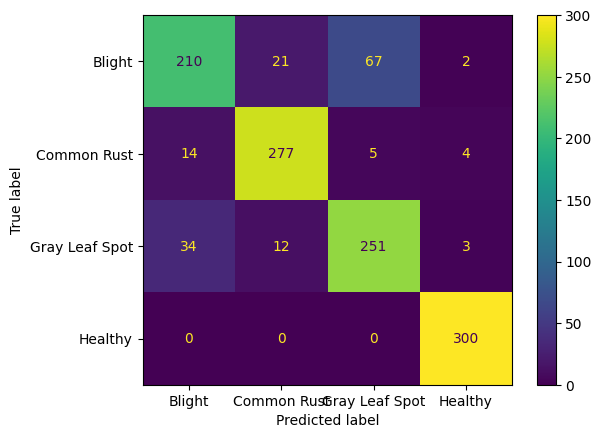

[[210  21  67   2]
 [ 14 277   5   4]
 [ 34  12 251   3]
 [  0   0   0 300]]


In [90]:
cm = confusion_matrix(y, predicted_data_integer)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ["Blight", "Common Rust", "Gray Leaf Spot", "Healthy"])

disp.plot()
plt.show()

print(cm)

In [92]:
print(classification_report(y, predicted_data_integer, target_names=["Blight", "Common Rust", "Gray Leaf Spot", "Healthy"]))

                precision    recall  f1-score   support

        Blight       0.81      0.70      0.75       300
   Common Rust       0.89      0.92      0.91       300
Gray Leaf Spot       0.78      0.84      0.81       300
       Healthy       0.97      1.00      0.99       300

      accuracy                           0.86      1200
     macro avg       0.86      0.86      0.86      1200
  weighted avg       0.86      0.86      0.86      1200

